In [1]:
#import the various libraries/directories that will be used for the linear regression. Use abreviations for ease of writing later on
import pandas as pd
#numpy is a common directory used for working with arrays
import numpy as np
#sklearn is a free machine-learning based directory
import sklearn
#directory used for creating graphs and plots
import matplotlib.pyplot as pyplot
import pickle

from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [2]:
# define 'data' variable as the imported version of forestfires.csv. 
# This is the dataset provided and contains data relating to the frequency and severity of forestfires
# It contains 13 columns detailing the various factors that influence fires
data = pd.read_csv("forestfires.csv", sep=",")

#print first 5 lines of the data variable - in this case, the forestfires.csv file.
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [3]:
#redefine data to include only the colums named in the array below.
# the other columns will not be used in the rest of the code.
# the data variable now only contains 4 columns
data = data[["temp", "wind", "rain", "area"]]

#print first 5 lines of data - now only 4 columns due to previous code
print(data.head())

   temp  wind  rain  area
0   8.2   6.7   0.0   0.0
1  18.0   0.9   0.0   0.0
2  14.6   1.3   0.0   0.0
3   8.3   4.0   0.2   0.0
4  11.4   1.8   0.0   0.0


In [4]:
#define vairable 'predict' as the area column - the amount of area burned by the correlated fire
predict = "area"

#define x and y axis as numpy arrays of the predict variable
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [5]:
#split data into seperate arrays, used for training and testing
#the test_size being 0.1 shows that 10% of the data will be used for testing
#this indicates 90% will be used for training
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [6]:
#define linear variable as linear regression function from sklearn library
#see above for the importation and use of sklearn
linear = linear_model.LinearRegression()

#fit a linear regression model onto the x_train and y_train variables. 
#these were defined above and contain the data which the model is to be trained on
linear.fit(x_train, y_train)

#calculate the accuracy score of the model - not nessescary for the model to work
acc = linear.score(x_test, y_test)



In [7]:
#save and then redefine the linear regression model using the pickle function
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear,f)
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [8]:
#print the coefficients and intercepts of the regression model
print('coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

coefficient: 
 [ 0.28726032  0.07306123 -1.03825019]
Intercept: 
 3.3885812782546756


In [9]:
#define the prediction variable as the regression model x variable
predictions = linear.predict(x_test)
#loop through the predictions(defined above) and print the prediction and actual variable
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

10.570758525584672 [23.4  6.3  0. ] 0.0
9.371898997294112 [20.6  0.9  0. ] 0.0
11.170017528242866 [26.3  3.1  0. ] 7.02
9.770246536686393 [21.3  3.6  0. ] 0.0
10.103337430149013 [21.9  5.8  0. ] 54.29
9.6105087537694 [21.1  2.2  0. ] 8.12
9.553056689554257 [20.9  2.2  0. ] 16.0
9.868544583787441 [22.1  1.8  0. ] 14.57
9.87734608340216 [21.8  3.1  0. ] 0.52
12.594199182843091 [30.8  4.9  0. ] 8.59
9.667960817984543 [21.3  2.2  0. ] 28.19
8.900162532794637 [18.5  2.7  0. ] 0.0
7.776528829435743 [13.8  5.8  0. ] 0.0
6.6970595601263705 [10.5  4.   0. ] 0.0
9.651354736655305 [21.7  0.4  0. ] 2.47
8.781441494250636 [17.4  5.4  0. ] 0.0
9.343842185623725 [18.9  7.2  0. ] 34.36
9.971827220389493 [21.9  4.   0. ] 70.76
10.586695386476723 [24.6  1.8  0. ] 1.43
7.213629679112552 [12.4  3.6  0. ] 12.1
7.9522034732447855 [15.2  2.7  0. ] 0.0
9.388505078623346 [20.2  2.7  0. ] 13.7
11.338556810774577 [26.2  5.8  0. ] 0.0
10.50500342070491 [23.4  5.4  0. ] 0.0
11.547443617242095 [26.8  6.3  0. ] 0.76

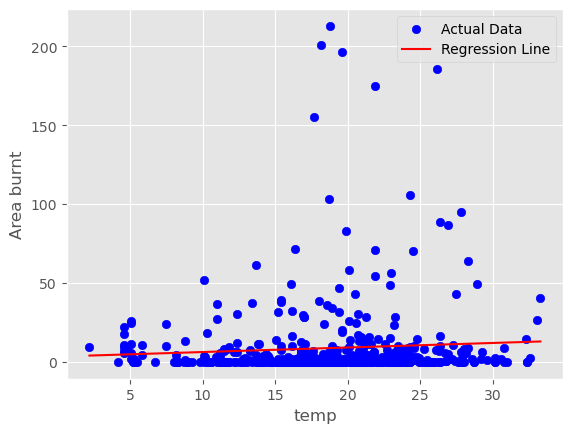

In [10]:
# Plot the data using ggplot, a data visualization package
style.use("ggplot")

#define the 'p' variable as a string 'temp'
p = "temp"
#add data and styling, such as the colour of data points
pyplot.scatter(data[p], data["area"], color='blue', label='Actual Data')

# Plot regression line 
slope = linear.coef_[0]  
intercept = linear.intercept_

# Use the min and max values of temp to create a regression line
x_range = np.linspace(data[p].min(), data[p].max(), 100)
y_range = slope * x_range + intercept
pyplot.plot(x_range, y_range, color='red', label='Regression Line')

#use pyplot to add lables to the y and x axsis.
pyplot.xlabel(p)
pyplot.ylabel("Area burnt")
pyplot.legend()
pyplot.show()
